In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
import os
os.chdir("/content/drive/Shareddrives/행복 범주 화이팅!/이미지현/data")

In [4]:
data = pd.read_csv('data_umap.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)

# 1) Hierarchical Clustering( AgglomerativeClustering)

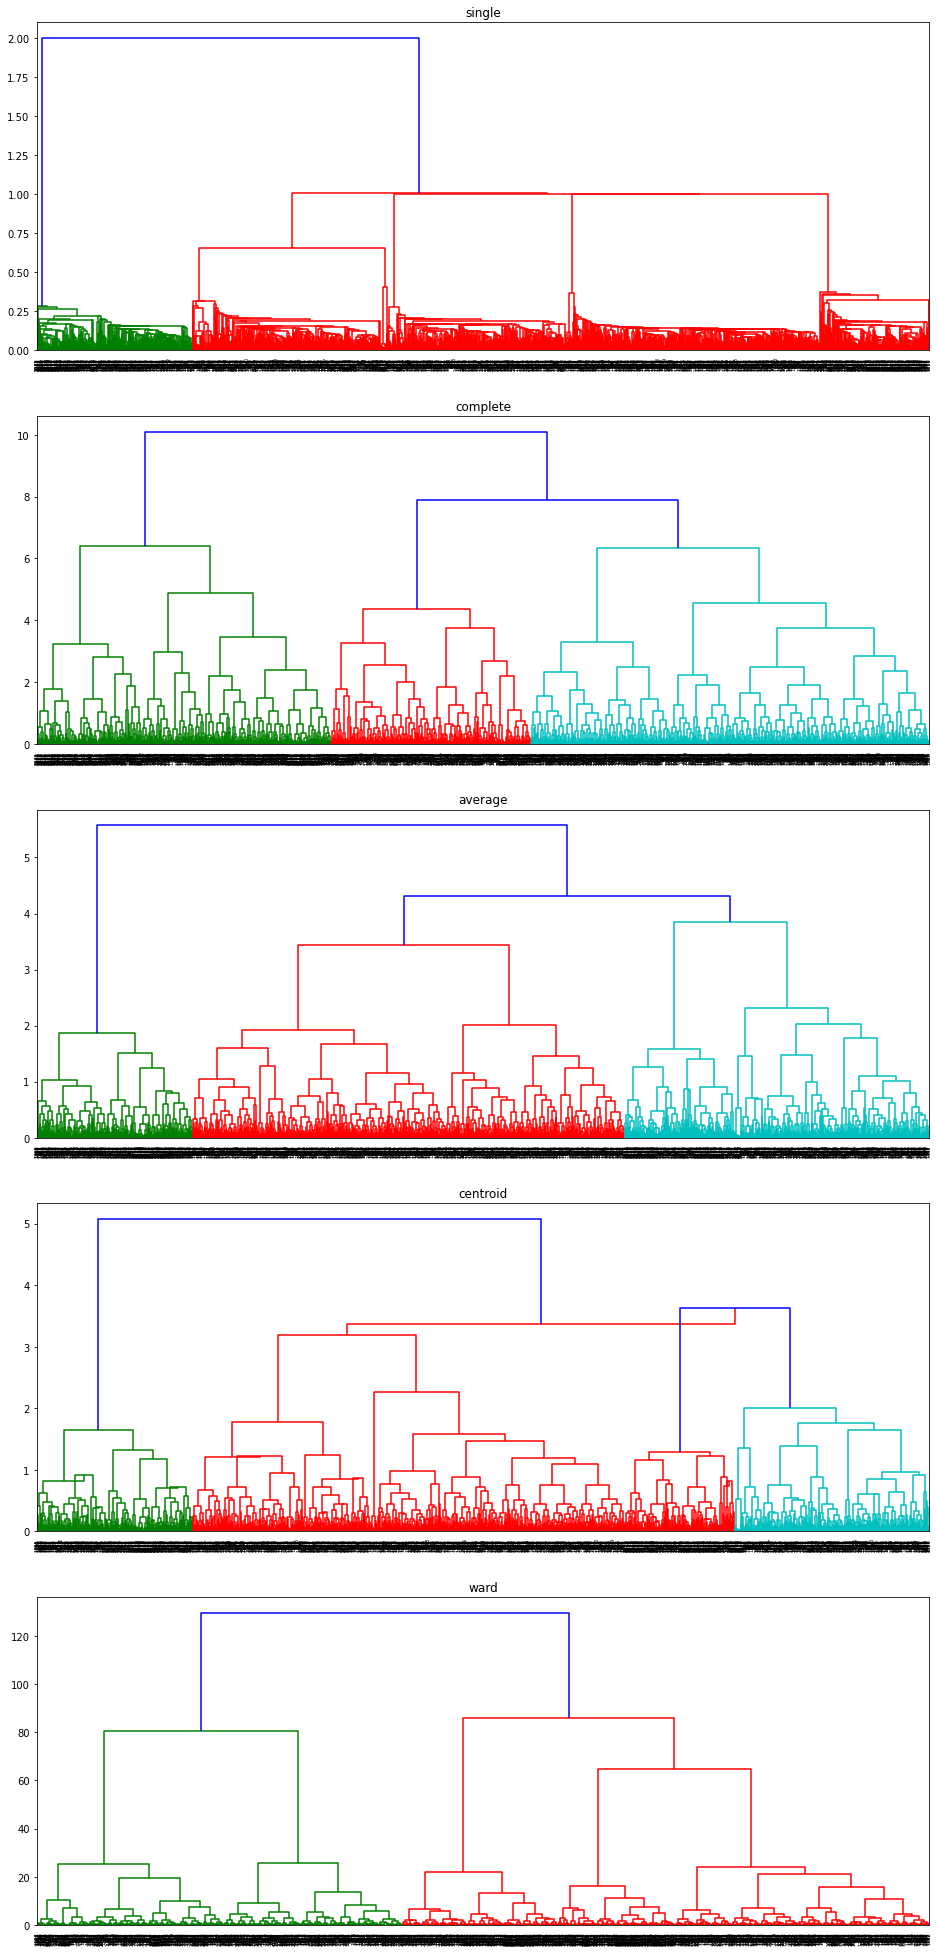

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


# 순서대로 single linkage, complete linkage, average linkage, centroid linkage, ward linkage 적용해보았다.
# 거리를 기준으로 proximity matrix를 만들고 이에 따라 cluster를 키워 나가는데,
# 군집 간 거리를 측정하는 방식이 달라지니 군집화가 이루어진 결과도 확연히 차이가 났다.

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']


fig, axes = plt.subplots(nrows=len(linkage_list), ncols=1, figsize=(16, 35))
for i in range(len(linkage_list)):
 
        hierarchical_single = linkage(data, method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i])
        axes[i].title.set_text(linkage_list[i])
plt.show()

In [ ]:
# 위의 dendrogram 결과 중 average가 비교적 균일하게 군집화가 이루어진 것 같아 
# cluster가 5가 되도록 클러스터링을 해보았다.
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
labels = agg_clustering.fit_predict(data)

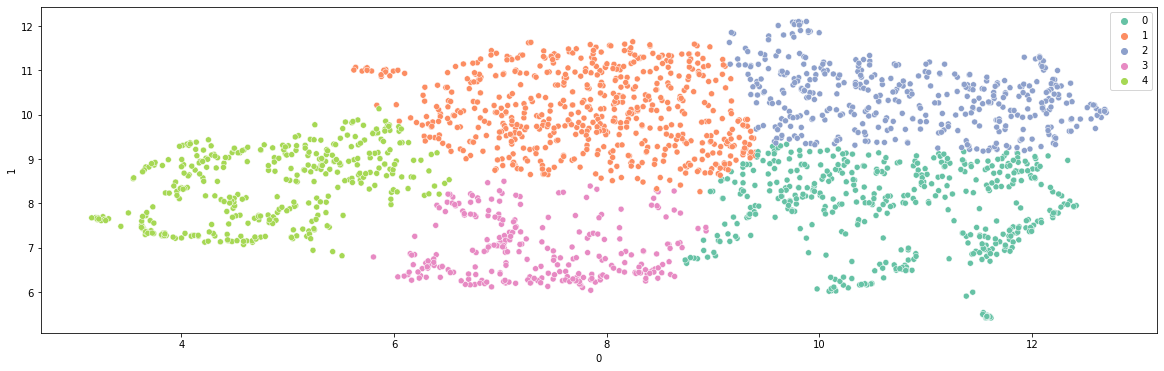

In [ ]:

plt.figure(figsize=(20, 6))

sns.scatterplot(x='0', y='1', data=data, hue=labels, palette='Set2')



In [ ]:
# 위의 dendrogram 결과 중 average가 비교적 균일하게 군집화가 이루어진 것 같아 
# cluster가 4가 되도록 클러스터링을 해보았다.
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg_clustering.fit_predict(data)

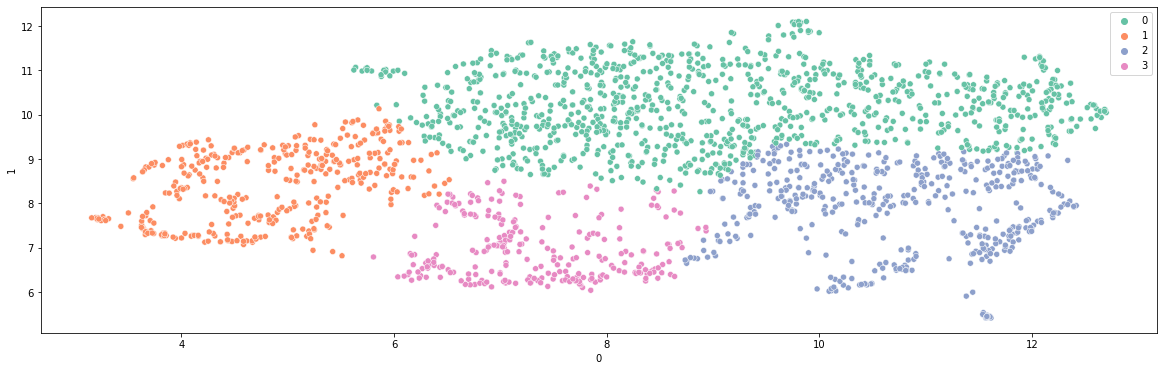

In [ ]:

plt.figure(figsize=(20, 6))

sns.scatterplot(x='0', y='1', data=data, hue=labels, palette='Set2')



# 2) KMeans

In [5]:
data

,0,1
0,9.086621,8.539823
1,10.795696,8.174501
2,5.190036,9.081718
3,8.117424,11.082774
4,9.675116,8.038979
...,...,...
2115,10.645260,8.166002
2116,9.347457,7.761325
2117,8.471015,8.332297
2118,12.095190,11.087412


In [6]:
from sklearn.cluster import KMeans

In [7]:
# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는 지 시각화
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (6, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

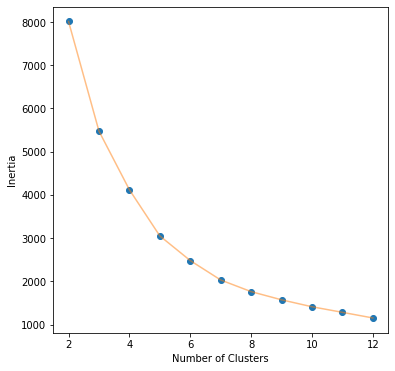

In [8]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# sacling하지 않은 데이터

change_n_clusters(n_clusters, data)

# 확실히 k-means는 3또는 4가 elbowpoint로 보임

In [16]:
#데이터를 kmeans(k=4)으로 학습하고 시각화
# 어느정도 군집화가 잘 된 것으로 보여진다.

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)



KMeans(n_clusters=5)

In [17]:
kmeans.cluster_centers_

array([[ 7.54440687e+00,  7.07708514e+00,  2.00000000e+00],
       [ 1.13219030e+01,  9.89449993e+00,  1.00000000e+00],
       [ 8.31051893e+00,  1.02500657e+01,  3.00000000e+00],
       [ 4.99285203e+00,  8.55874190e+00, -6.43929354e-15],
       [ 1.07651398e+01,  7.64976442e+00,  1.11504425e+00]])

In [18]:
data['cluster'] = kmeans.labels_


In [19]:
grouped = data.groupby('cluster')
grouped.size()

cluster
0    299
1    379
2    692
3    412
4    338
dtype: int64

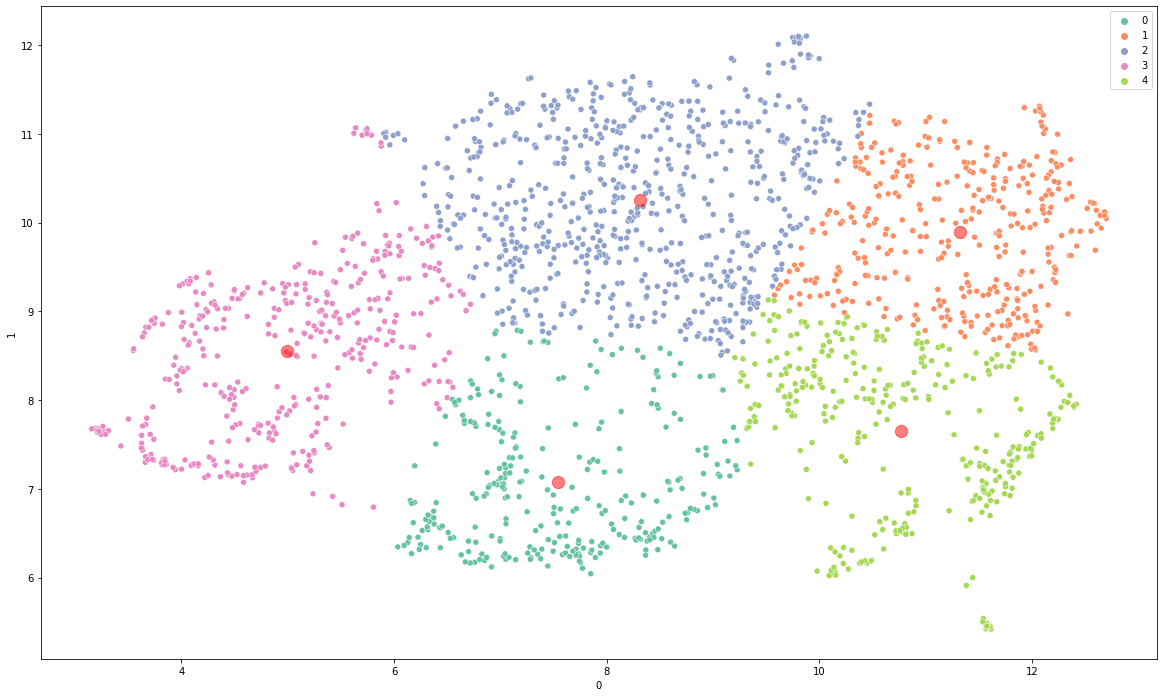

In [29]:
plt.figure(figsize=(20, 12))

sns.scatterplot(x='0', y='1', data=data, hue=kmeans.labels_,palette="Set2")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)

In [21]:
df = pd.read_csv('/content/drive/Shareddrives/행복 범주 화이팅!/이미지현/data/pca_scailing_391.csv')

In [22]:
df_name = df.iloc[:,1]

In [23]:
df_name = df_name.str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [24]:
df_name

0                          무삭제귀멸의칼날
1                         주술회전part1
2                          지박소년하나코군
3                              호리미야
4                         주술회전part2
                   ...             
2115    요란THEPRINCESSOFSNOWANDBLOOD
2116                     게드전기어스시의전설
2117                   더빙지브리컬렉션vol3
2118                        이웃집야마다군
2119                             낙원
Name: name, Length: 2120, dtype: object

In [ ]:
final_df = pd.concat([df_name,data],axis=1)

In [ ]:
final_df.to_csv('data_umap_kmeans4.csv',encoding = 'utf-8-sig')

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

In [26]:
### Hierarchical, kmeans, kmedoids 클러스터링을 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=n_cluster, linkage=clustering[1])
        elif clustering[0] == 'kmeans':
            model = KMeans(n_clusters=n_cluster)
        elif clustering[0] == 'kmedoids':
            model = KMedoids(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
        
        #if clustering[0] == 'dbscan':
        #    n_cluster = len(set(cluster_labels))-1
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [27]:
params = {'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_kmeans = {}
for n_cluster in params['n_clusters']:
    model = KMeans(n_clusters=n_cluster)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    scores_kmeans['_'.join(['original', str(n_cluster)])] = score

pd.Series(scores_kmeans).sort_values(ascending=False)[:10]

original_5    0.531509
original_4    0.478519
original_6    0.477367
original_7    0.457281
original_3    0.404033
original_2    0.376694
dtype: float64

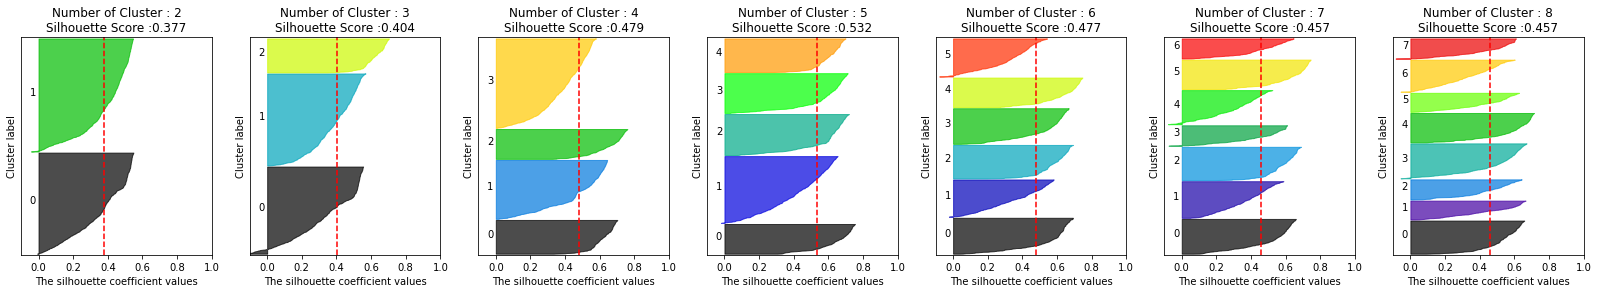

In [28]:
visualize_silhouette(['kmeans'], data, [2,3, 4, 5, 6, 7, 8])

# 3) DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

0.22958784161250786


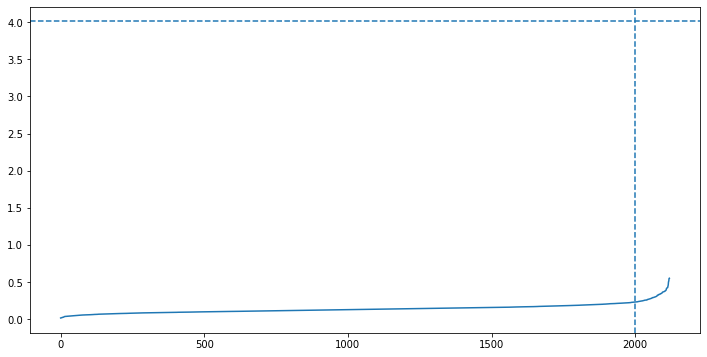

In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data)
distances, indices = neigh.kneighbors(data) # 각 개체마다 거리를 계산해서 가까운 거리의 5개와 그 떄의 index 반환

# 4-dist를 plotting 해보기
# 저 빨간점에서 급격히 4-dist가 급증하였다 -> 우리는 이 때의 distance인 18을 eps로, 4를 minpts로 잡고 DBSCAN을 진행해보도록 하자.
plt.figure(figsize=(12, 6))
plt.plot(np.sort(distances[:, 4]))
plt.axvline(2000, 0, 2, ls='--')
plt.axhline(4.01, 0, 200, ls='--')

print(np.sort(distances[:, 4])[2000])

[0]


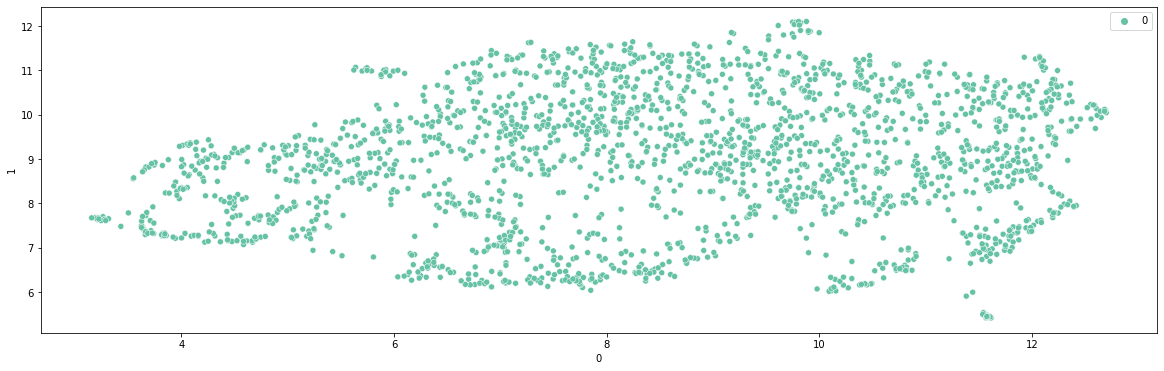

In [ ]:
dbscan = DBSCAN(eps=4.01, min_samples=4) # scaling 하지 않은 데이터로 DBSCAN 학습
dbscan.fit(data)

print(np.unique(dbscan.labels_))

plt.figure(figsize=(20, 6))

sns.scatterplot(x='0', y='1', data=data, hue=dbscan.labels_, palette='Set2')

# DBSCAN은 밀도가 급격히 변할 때 군집을 잘 인식하지 못하는데, 이 데이터가 그러하여 군집을 잘 찾지 못한 것 같다.
# (촘촘한 밀도를 고려하지 못하고 전체를 하나의 군집으로 인식)
# 실제로 DBSCAN한 결과 1개의 cluster만 형성되었다. (-1은 noise point이다.)
# 이 데이터에는 DBSCAN이 적합하지 않은 것으로 예상된다.

# 폭망

# 4) spectralClustering

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# 적절한 bandwidth 계산
bandwidth = estimate_bandwidth(data)
print('bandwidth 값:', round(bandwidth,3))

meanshift = MeanShift(bandwidth=bandwidth)
labels = meanshift.fit_predict(data)

print(labels)

bandwidth 값: 3.061
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=n_cluster, linkage=clustering[1])
        elif clustering[0] == 'kmeans':
            model = KMeans(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
        
        #if clustering[0] == 'dbscan':
        #    n_cluster = len(set(cluster_labels))-1
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
params = {
    'linkage':['single', 'complete', 'average', 'ward'],
    'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_hierarcical= {}
for linkage in params['linkage']:
    for n_cluster in params['n_clusters']:
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(data)
        score = silhouette_score(data, hierarchical.labels_)
        scores_hierarcical['_'.join(['original', linkage, str(n_cluster)])] = score
        
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(data)
        score = silhouette_score(data, hierarchical.labels_)
        scores_hierarcical['_'.join(['scaling', linkage, str(n_cluster)])] = score

pd.Series(scores_hierarcical).sort_values(ascending=False)[:10]

# 전반적으로 scaling을 적용한 후에 silhouette score가 낮아졌다.
# 아무래도 scaling하기 전의 척도가 군집화를 수행함에 있어 적절했던 것으로 예상된다.
# (데이터마다 scaling이 좋을수도, 나쁠수도 있다.)

scaling_ward_5        0.529405
original_ward_5       0.529405
scaling_average_5     0.528761
original_average_5    0.528761
scaling_single_5      0.528761
original_single_5     0.528761
scaling_average_7     0.503520
original_average_7    0.503520
scaling_average_6     0.492239
original_average_6    0.492239
dtype: float64

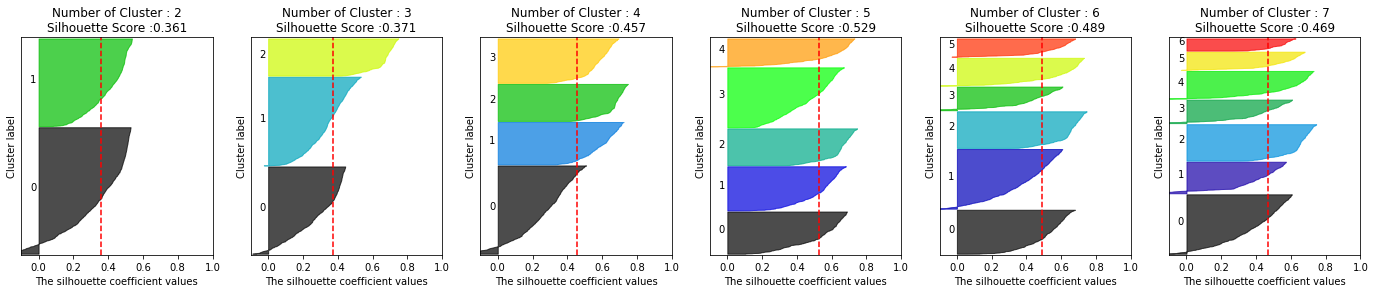

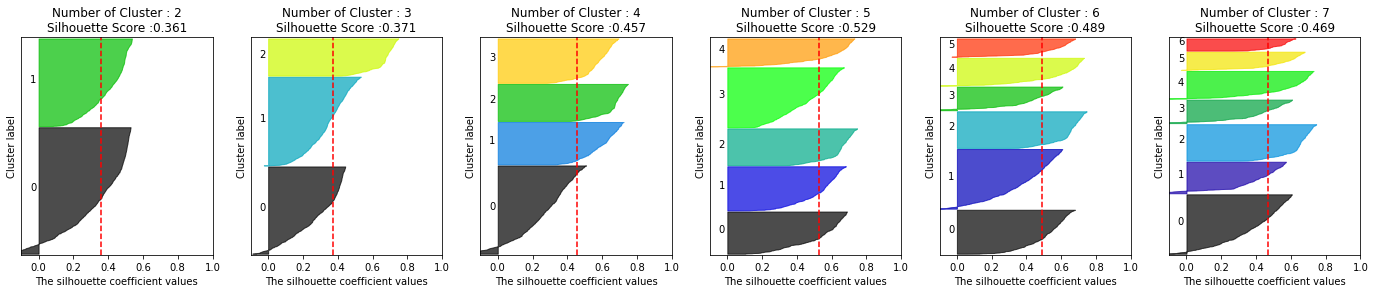

In [ ]:
# 위의 결과를 바탕으로 silhouette score를 확인해보았다.
# 실루엣 지수 해석 시 silhouette score만 좋다고 해서 좋은 clustering이라고 판단하면 안된다.
# 한 cluster silhouette 지수가 좋아서 전반적인 silhouette score가 높은 것이라면 그것은 clustering이 잘 되었다고 해석하기에는 무리가 있기 때문이다.

# 아래의 그림을 보면 cluster=6일 때 silhouette score가 높지만 5일 때도 유사하게 높으며 또한 5개의 cluster로 분류된 경우 전반적으로 모든 cluster의 실루엣 지수가 높다.
# 6개보다 5개로 군집화 했을 경우 silhouette 지수가 음수인 경우가 드물어 보인다.
# 따라서 무작정 군집의 수를 6으로 설정하기 보다는 5개인 경우와 6개인 경우를 모두 시각화해보고 적절해보이는 결과를 채택하는 것이 옳아 보인다.

visualize_silhouette(['hierarchical', 'ward'], data, [2, 3, 4, 5, 6, 7]) # 위가 original data
visualize_silhouette(['hierarchical', 'ward'], data, [2, 3, 4, 5, 6, 7]) # 아래가 scaled data

In [ ]:
params = {'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_kmeans = {}
for n_cluster in params['n_clusters']:
    model = KMeans(n_clusters=n_cluster)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    scores_kmeans['_'.join(['original', str(n_cluster)])] = score
    
    model = KMeans(n_clusters=n_cluster)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    scores_kmeans['_'.join(['scaled', str(n_cluster)])] = score

pd.Series(scores_kmeans).sort_values(ascending=False)[:10]

# 계층적 군집화와 마찬가지로 전반적으로 scaling을 적용한 후에 silhouette score가 낮아졌다 

scaled_5      0.530396
original_5    0.530396
scaled_6      0.472795
original_6    0.468587
scaled_4      0.458947
original_4    0.458698
original_7    0.456926
scaled_7      0.441793
scaled_3      0.409396
original_3    0.409396
dtype: float64

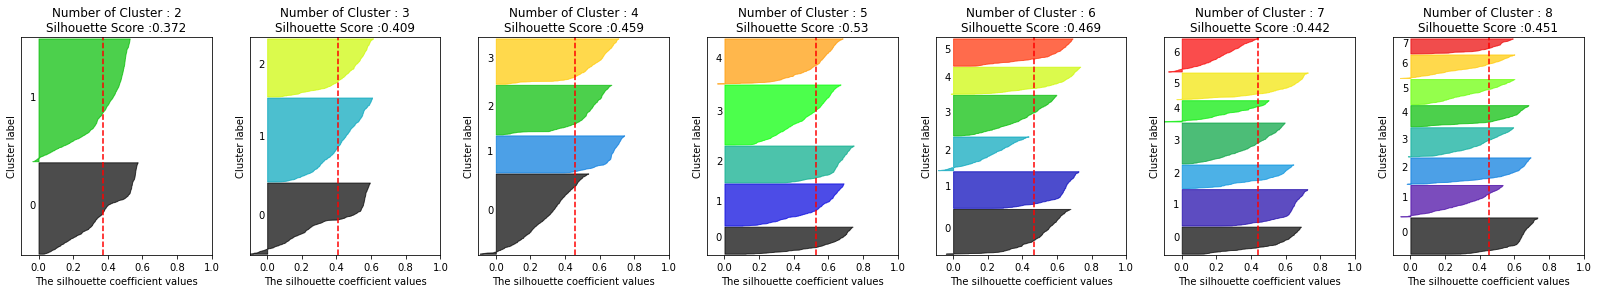

In [ ]:
visualize_silhouette(['kmeans'], data, [2,3, 4, 5, 6, 7, 8])


In [ ]:
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=4.01, min_samples=4)
dbscan.fit(data)
print( silhouette_score(data, dbscan.labels_) ) # 실제로는 1개의 군집이기 때문에 silhouette score가 계산이 안되어야 한다고 생각한다.
print(print( silhouette_score(data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]) )) # noise 제외한 silhouette score
#망망 폭망

# original data에서 DBSCAN은 하나의 cluster만 만들고, scaled data에서는 두 개의 cluster를 만들었었다.
# 실제 시각화 결과에서도 딱히 군집화가 잘 되었다고 생각하지 않았는데, silhouette score 역시 높지 않다.
# hierarchical clustering이나 KMeans에 비해 silhouette score가 낮은 것으로 보아 본 데이터에는 DBSCAN이 적합하지 않은 것으로 보인다.
# (아무래도 일정한 밀도를 유지하고 있는 데이터가 아니기 때문이지 않을까?

ValueError: ignored

# 5)Agglomomerative with n clusters

In [ ]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [ ]:
n = [2,3,4,5,6,7,8,9]
#data.drop(['cluster'],axis=1,inplace=True)
for i in n:
    agg = AgglomerativeClustering(n_clusters=i)
    cluster = agg.fit(data)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d4 = pd.DataFrame()
    d4 = pd.concat([data,cluster_id],axis=1)
    d4.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
    plt.title('Agglomerative with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

ValueError: ignored

# 6) Affinity propagation

In [ ]:
ap = AffinityPropagation(damping=0.9) # damping에 따라 클러스터 생성개수가 크게 차이남
cluster = ap.fit(data)
cluster_id = pd.DataFrame(cluster.labels_)

d5 = pd.DataFrame()
d5 = pd.concat([data,cluster_id],axis=1)
d5.columns = [0, 1, "cluster"]

sns.scatterplot(d5[0], d5[1], hue = d5['cluster'], legend="full")
plt.title('Affinity Propagation {} clusters'.format(len(d5.cluster.unique())))
plt.show()

# cluster 라벨이 하나 밖에 생기지 않아서 실루엣 계수가 구해지지 않음
print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d5.iloc[:,:-1], d5['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d5.iloc[:,:-1], d5['cluster'])))

ValueError: ignored

# 7)Mean Shift

In [ ]:
n = [10,15,25, 50, 100]    
for i in n:
    bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=i)
    ms = MeanShift(bandwidth=bandwidth)
    cluster = ms.fit(data)
    cluster_id = pd.DataFrame(cluster.labels_)

    d6 = pd.DataFrame()
    d6 = pd.concat([data,cluster_id],axis=1)
    d6.columns = [0, 1, "cluster"]

    sns.scatterplot(d6[0], d6[1], hue = d6['cluster'], legend="full")
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()

    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d6.iloc[:,:-1], d6['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d6.iloc[:,:-1], d6['cluster'])))

In [ ]:
n = [25, 30,35,40,45]    
for i in n:
    bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=i)
    ms = MeanShift(bandwidth=bandwidth)
    cluster = ms.fit(data)
    cluster_id = pd.DataFrame(cluster.labels_)

    d6 = pd.DataFrame()
    d6 = pd.concat([data,cluster_id],axis=1)
    d6.columns = [0, 1, "cluster"]

    sns.scatterplot(d6[0], d6[1], hue = d6['cluster'], legend="full")
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()

    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d6.iloc[:,:-1], d6['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d6.iloc[:,:-1], d6['cluster'])))

실루엣 계수 시각화 해야할 것: mean shift, affinity
다 준비된건: kmeans, Hierarchical Clustering(Agglomerative), DBSCAN

버릴것 spectral Clustering
추가로 할 것 kmedoids

# 8) K-medoids


In [ ]:
# 모듈 찾느라 한참걸림
!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는 지 시각화
# elbowpoint
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmedoids = KMedoids(n_clusters=n_cluster)
        kmedoids.fit(data)
        sum_of_squared_distance.append(kmedoids.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

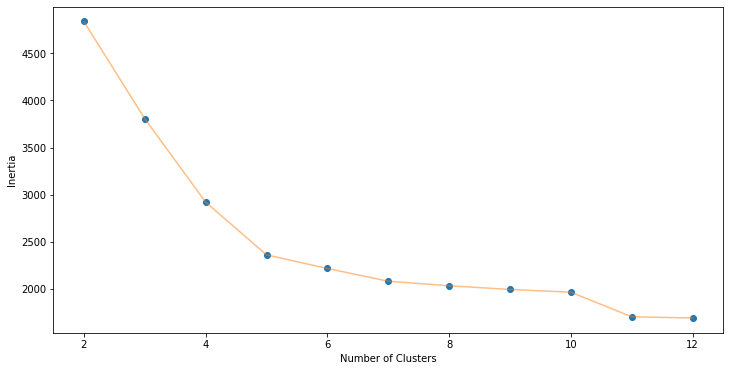

In [ ]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
change_n_clusters(n_clusters, data)

In [ ]:
kmedoids = KMedoids(n_clusters=5)
kmedoids.fit(data)

KMedoids(n_clusters=5)

In [ ]:
data['cluster'] = kmedoids.labels_
grouped = data.groupby('cluster')
grouped.size()

cluster
0    272
1    452
2    602
3    370
4    424
dtype: int64

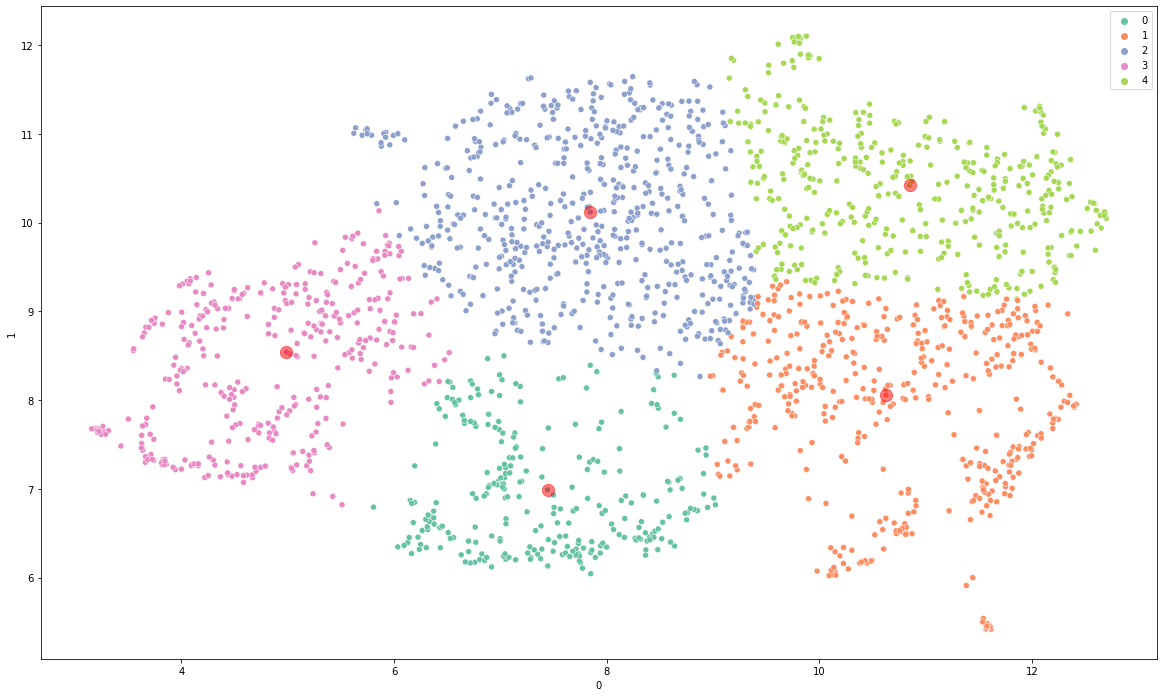

In [ ]:
plt.figure(figsize=(20, 12))

sns.scatterplot(x='0', y='1', data=data, hue=kmedoids.labels_,palette="Set2")
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)

In [ ]:
params = {'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_kmedoids = {}
for n_cluster in params['n_clusters']:
    model = KMedoids(n_clusters=n_cluster)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    scores_kmedoids['_'.join(['original', str(n_cluster)])] = score

pd.Series(scores_kmedoids).sort_values(ascending=False)[:10]

original_5    0.541533
original_6    0.465369
original_7    0.455244
original_4    0.454641
original_3    0.421729
original_2    0.329564
dtype: float64

UnboundLocalError: ignored

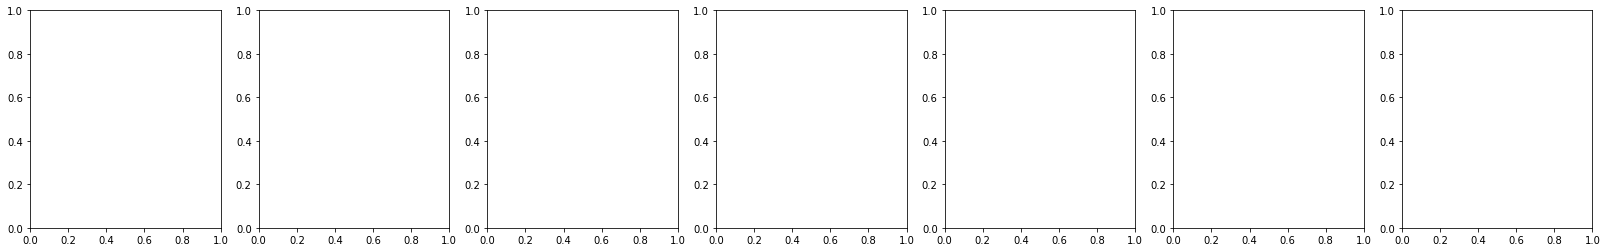

In [ ]:
visualize_silhouette(['kmedoids'], data, [2,3, 4, 5, 6, 7, 8])

# 실루엣계수


### Hierarchical(AgglomerativeClustering)

In [ ]:
params = {
    'linkage':['single', 'complete', 'average', 'ward'],
    'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_hierarcical= {}
for linkage in params['linkage']:
    for n_cluster in params['n_clusters']:
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(data)
        score = silhouette_score(data, hierarchical.labels_)
        scores_hierarcical['_'.join(['original', linkage, str(n_cluster)])] = score

pd.Series(scores_hierarcical).sort_values(ascending=False)[:10]



original_complete_2    0.422824
original_average_2     0.415771
original_ward_4        0.381681
original_ward_2        0.369135
original_average_3     0.359069
original_ward_5        0.356778
original_average_7     0.351875
original_ward_7        0.351781
original_ward_3        0.349145
original_ward_6        0.345848
dtype: float64

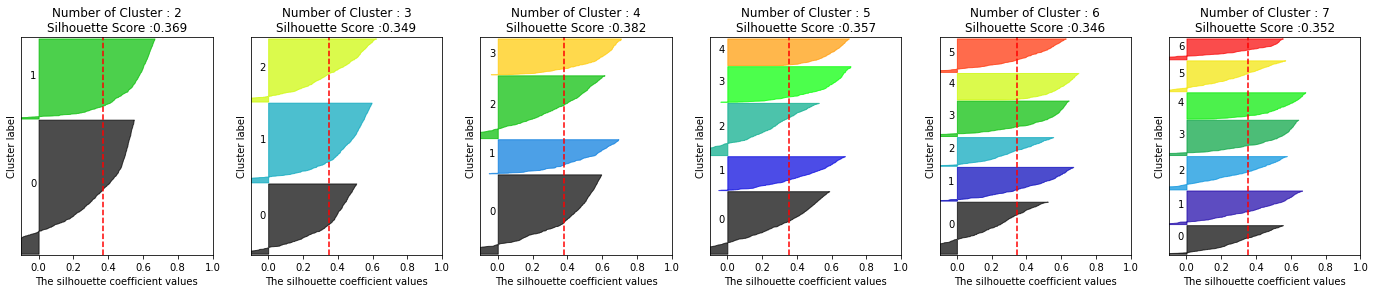

In [ ]:
# 실루엣 지수 해석 시 silhouette score만 좋다고 해서 좋은 clustering이라고 판단하면 안된다.
# 한 cluster silhouette 지수가 좋아서 전반적인 silhouette score가 높은 것이라면 그것은 clustering이 잘 되었다고 해석하기에는 무리가 있기 때문이다.
visualize_silhouette(['hierarchical', 'ward'], data, [2, 3, 4, 5, 6, 7])
